# Blind Search Methods:

### BFS (Breadth First Search) and DFS (Depth First Search)

#### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#### Define Node() Class for Search Nodes:

In [2]:
class Node():
    def __init__(self, parent_node = None, position = None): # define constructor function
        self.parent_node = parent_node
        self.position = position    # define the state as position on the maze in (x, y) coordinates
        self.cost = 0

    # define function to compare if two nodes are in the same position or not
    def __eq__(self, other):
        return self.position == other.position

    # define a hash method to avoid errors (will not add nodes to fringe list without this: "Unhashable Type: Node" Error)
    def __hash__(self):
        return hash(self.position)
    
    # function for printing the state of a node if needed
    # source: https://stackoverflow.com/questions/1535327/how-to-print-instances-of-a-class-using-print
    def __repr__(self):
        return f"{self.position}"

#### Define a Successor Function For Searching:

In [3]:
def successor_func(maze, start, goal, method):
    
    # Declare generic Start and Goal Nodes: Coordinates are contained in the main() function
    start_node = Node(None, start)
    start_node.cost = 0
    goal_node = Node(None, goal)
    goal_node.cost = 0

    fringe = []                     # define the fringe as an open list
    sizeFringeArray = []            # define a list to hold the size of the fringe at each iteration
    visited = set()                 # define a set for nodes that have been previously visited to avoid infinite loop
    
    fringe.append(start_node)       # add the start_node (starting position on the maze) to the fringe

    fringe_size = 0                 # define the number of nodes in the fringe
    expanded_nodes = 0              # define the number of expanded nodes in the search tree

    goalFound = False

    while len(fringe) > 0:

        current_node = fringe[0]    # set the 1st node in the FRINGE as the current node to be popped and visited/expanded
        current_index = 0

        fringe.pop(current_index)   # pop the 1st index from the FRINGE
        visited.add(current_node)   # add current node to the closed list set so it is not visited twice

        if current_node == goal_node:   # if the goal node is found
            goalFound = True
            path = []                   # declare a list for the path travelled
            current = current_node
            while current is not None:  # loop until the start position is found
                path.append(current.position)
                current = current.parent_node
            return (sizeFringeArray, goalFound, expanded_nodes, fringe_size, path[::-1]) # return num of while loop iterations, expanded nodes, fringe size, path from start to goal
        
        # if current_node != goal_node: need to generate the child nodes of the popped node.
        expanded_nodes += 1     # mark the popped node as expanded and increment the counter
        sizeFringeArray.append(len(fringe)) # append the next index with the current fringe size
        
        if(len(fringe) > fringe_size):
            fringe_size = len(fringe)   # update the fringe_size variable declared above

        children = []   # declare a list to contain the child nodes / positions on the maze.

        # This loop generates valid successor child nodes from the current position on the maze
        # defines a valid move across terrain for the agent
        for adjacent_squares in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # loop through adjacent & diagonal squares to current positions
            
            node_position = (current_node.position[0] + adjacent_squares[0], current_node.position[1] + adjacent_squares[1])    # get node position
            
            # define a legal move within the valid range (if you are at (0,0) then you cant move up and/or left)
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue    # skip this position if illegal move (out of bounds)
            
            if maze[node_position[0]][node_position[1]] != 0:   # Make sure walkable terrain: 0 defined as walkable terrain, 1 is an obstacle
                continue    # skip this one if terrain is an obstacle

            new_node = Node(current_node, node_position)    # Create new search node with parent = current_node, and position = node_position for a valid successor

            children.append(new_node)   # Append the new node as a valid successor to the list of children.

        for child in children:  # loop through the child nodes created in previous for loop

            if child in visited:
                continue    # skip if this node has already been visited
            
            # calculate the cost/distance to the next move (straight or diagonal)
            # child.cost = current_node.cost + 1       # uncomment if diagonal and horizontal/vertical cost is the same, or diagonal moves are not permitted
            child.cost = current_node.cost + (np.sqrt(np.square(child.position[0] - current_node.position[0]) + np.square(child.position[1] - current_node.position[1])))

            doesChildExist = False      # declare a new variable for determination if the child node already exists
            for node in fringe:         # loop to search every child node in the fringe
                if child == node and child.cost > node.cost:
                    doesChildExist = True
                    continue            # skip adding to the fringe if the child exists already in the fringe
            
            # if we get here, we can add the child node to the FRINGE
            if doesChildExist == False:
                if method == 'BFS':
                    fringe.append(child)    # BFS appends to the end (Queue)
                else:
                    fringe.insert(0, child) # DFS inserts at the top (Stack)

#### Function For Calculating Solution Path Length:

In [4]:
def pathLength(path):   # define a function for calculating path length
    distance = 0        # set initial distance to zero
    for i in range(len(path) - 1):    # loop through the path coordinates from successor function
        x1 = path[i][0]
        y1 = path[i][1]
        x2 = path[i + 1][0]
        y2 = path[i + 1][1]
        distance = distance + (np.sqrt(np.square(x1 - x2) + np.square(y1 - y2))) # Euclidean Distance
    return(distance)    # return the calculated distance

#### 1st Run:

 - Compare BFS / DFS Solution Paths, Total # Of Search Nodes & Solution Path Length With Data Visualization.

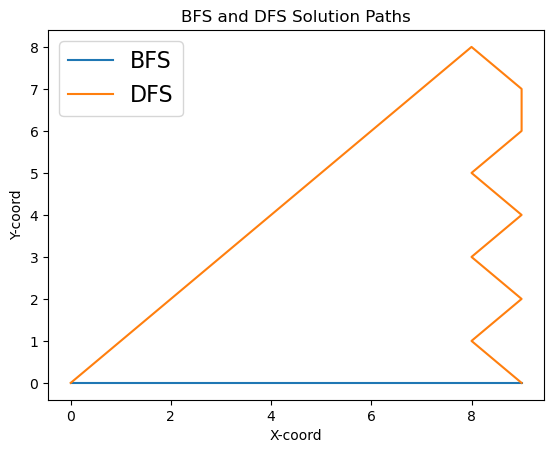

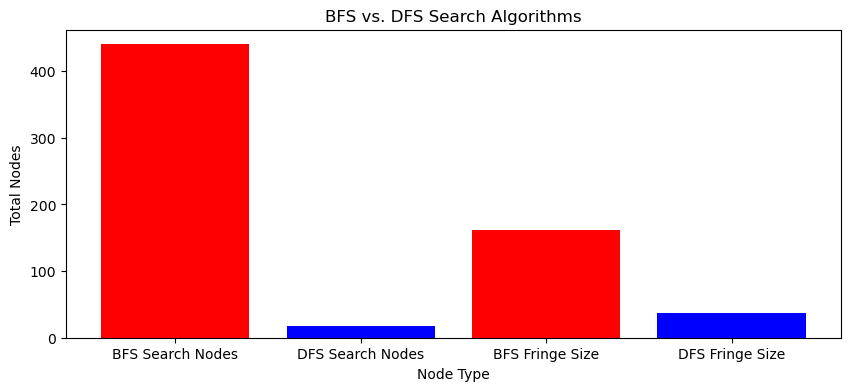

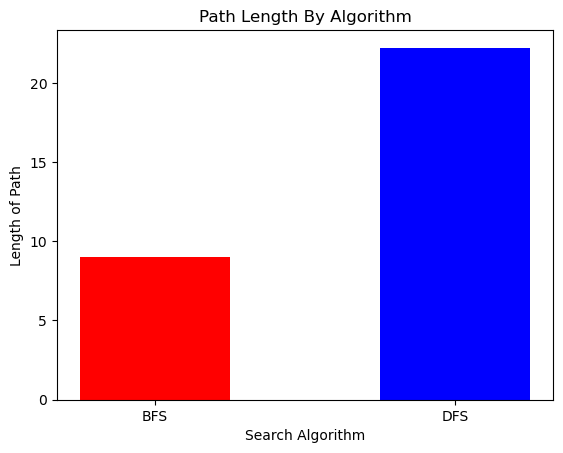

In [6]:
maze = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# define the start and goal coordinates here
start = (0, 0)
goal = (9, 0)

# 1st Run: BFS Method
method = 'BFS'
# define returned variables for printing
BFS_fringeArray, BFS_Goal, BFS_expanded_nodes, BFS_fringe_size, BFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

# 2nd run: DFS w/ same start and goal coordinates
method = 'DFS'
# define returned variables for printing
DFS_fringeArray, DFS_Goal, DFS_expanded_nodes, DFS_fringe_size, DFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

plt.figure()
# one line plots: https://stackoverflow.com/questions/21519203/plotting-a-list-of-x-y-coordinates-in-matplotlib
plt.plot(*zip(*BFS_path))
plt.plot(*zip(*DFS_path))
plt.xlabel('X-coord')
plt.ylabel('Y-coord')
plt.title("BFS and DFS Solution Paths")
# Legend: https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
plt.legend(['BFS', 'DFS'], fontsize=16, loc='upper left')
plt.show()


# First Bar plot: # Number of Search nodes and Number of Nodes in Fringe
# Source: https://www.geeksforgeeks.org/graph-plotting-in-python-set-1/
# x-coordinates of the Bars:
x1 = [1, 2, 3, 4]

# heights of the bars:
height1 = [BFS_expanded_nodes, DFS_expanded_nodes, BFS_fringe_size, DFS_fringe_size]

# Individual bar labels:
labels1 = ['BFS Search Nodes', 'DFS Search Nodes', 'BFS Fringe Size', 'DFS Fringe Size']

# increase size of figure:
# Source: https://datascienceparichay.com/article/change-figure-size-matplotlib/
plt.figure(figsize=(10, 4))

# plot the bar graph:
plt.bar(x1, height1, tick_label = labels1, width=0.8, color=['red', 'blue', 'red', 'blue'])

# name axes & title:
plt.xlabel('Node Type')
plt.ylabel('Total Nodes')
plt.title('BFS vs. DFS Search Algorithms')

# Display the plot
plt.show()


# 2nd Bar plot: Path length for each algorithm
x2 = [1, 2]
height2 = [pathLength(BFS_path), pathLength(DFS_path)]
labels2 = ['BFS', 'DFS']
plt.figure()
plt.bar(x2, height2, tick_label = labels2, width=0.5, color = ['red', 'blue'])
plt.xlabel('Search Algorithm')
plt.ylabel('Length of Path')
plt.title('Path Length By Algorithm')
plt.show()


#### 2nd Run:

 - Given an initial node (0,0), and a goal node (9,9), create two nodes which denote the initial and goal states. Design a 10x10 maze game board (with 100 locations), where 0 denotes open field and 1 denotes obstacle.<br><br>

 - Design a successor function which takes a node and the maze game board layout as input, and returns successor(s) of the current node (the return values are a list of node(s)). The returned successor(s) must satisfy the maze game board constraints.<br><br>

 - Create a FIFO or a LIFO Fringe & insert initial node to the Fringe. Then create a while loop, which continues as long as the Fringe is not empty. Inside the while loop, pop out one node from the Fringe (one at a time), and use successor function to find its successors, then insert all successors to the Fringe. Record number of nodes in the Fringe with respect to the number of while loop repetitions. Draw the plot (x-axis shows number of repetitions, and y-axis shows number of nodes). Explain the trend of the growth patterns (e.g. linear, exponential etc.) Each time pop out a node from the Fringe, check whether the node is the goal node. Return “Goal” if finds the goal, or continue otherwise.<br><br>

 - Use Data Visualization to plot the number of nodes in the fringe over time.

1st Run with BFS Algorithm: GOAL FOUND
---------------------------
Start Position: (0, 0)
Goal Position: (9, 9)
Path Length: 12.727922
Solution Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Search Nodes Created (While loop iterations) = 604
Max Fringe Size = 164
-----------------------------------------------------------------------------------

2nd Run with Depth First Search: GOAL FOUND
--------------------------------
Start Position: (0, 0)
Goal Position: (9, 9)
Path Length: 12.727922
Solution Path: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]
Search Nodes Created (While loop iterations) = 9
Max Fringe Size = 27
-----------------------------------------------------------------------------------

Analysis:
---------
Both DFS and BFS paths are the same distance
Depth First Search expanded fewer nodes to find goal
Depth First Search created less nodes in the fringe
---------------------------------------------

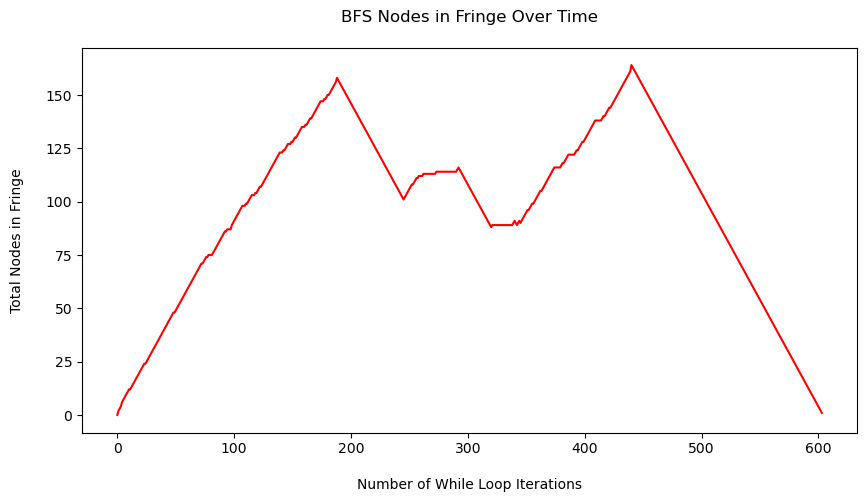

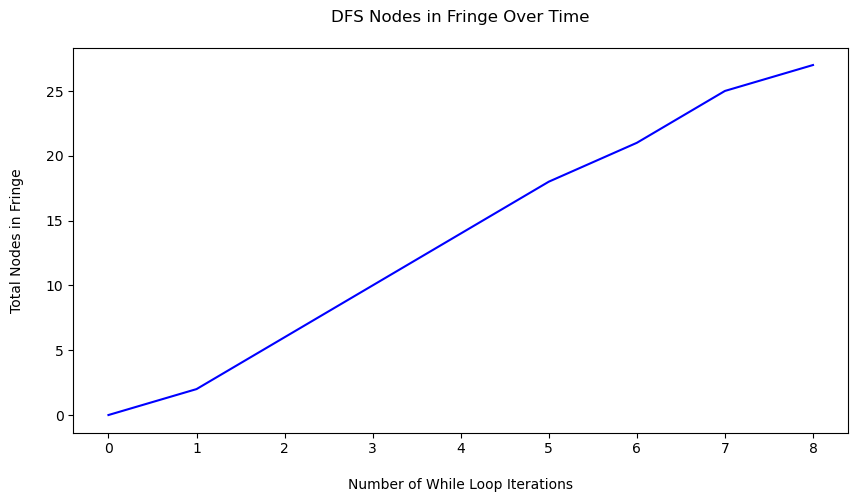

In [7]:
maze = [[0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# define the start and goal coordinates here
start = (0, 0)
goal = (9, 9)

# 1st Run: BFS Method
method = 'BFS'
# define returned variables for printing
BFS_fringeArray, BFS_Goal, BFS_expanded_nodes, BFS_fringe_size, BFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

if BFS_Goal:
    print("1st Run with BFS Algorithm: GOAL FOUND\n---------------------------")
else:
    print("1st Run with BFS Algorithm: FAILED TO FIND GOAL\n---------------------------")
print(f"Start Position: {start}\nGoal Position: {goal}\nPath Length: {pathLength(BFS_path):.6f}")
print(f"Solution Path: {BFS_path}\nSearch Nodes Created (While loop iterations) = {BFS_expanded_nodes}")
print(f"Max Fringe Size = {BFS_fringe_size}\n-----------------------------------------------------------------------------------\n")

# 2nd run: DFS w/ same start and goal coordinates
method = 'DFS'
# define returned variables for printing
DFS_fringeArray, DFS_Goal, DFS_expanded_nodes, DFS_fringe_size, DFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

if DFS_Goal:
    print("2nd Run with Depth First Search: GOAL FOUND\n--------------------------------")
else:
    print("2nd Run with Depth First Search: FAILED TO FIND GOAL\n--------------------------------")
print(f"Start Position: {start}\nGoal Position: {goal}\nPath Length: {pathLength(DFS_path):.6f}")
print(f"Solution Path: {DFS_path}\nSearch Nodes Created (While loop iterations) = {DFS_expanded_nodes}")
print(f"Max Fringe Size = {DFS_fringe_size}")
print("-----------------------------------------------------------------------------------\n")

print("Analysis:\n---------")
if BFS_path < DFS_path:
    print("BFS Path is optimal")
elif BFS_path > DFS_path:
    print("DFS path is optimal")
else:
    print("Both DFS and BFS paths are the same distance")

if BFS_expanded_nodes < DFS_expanded_nodes:
    print("Breadth First Search expanded fewer nodes to find goal")
elif BFS_expanded_nodes > DFS_expanded_nodes:
    print("Depth First Search expanded fewer nodes to find goal")
else:
    print("Both DFS and BFS expanded equal amounts of nodes")

if BFS_fringe_size < DFS_fringe_size:
    print("Breadth First Search has less nodes in the fringe")
elif BFS_fringe_size > DFS_fringe_size:
    print("Depth First Search created less nodes in the fringe")
else:
    print("BFS and DFS fringe size contain equal node amounts")
print("-----------------------------------------------------------------------------------\n")

'''debug
print(f'Length of BFS_fringeArray: {len(BFS_fringeArray)}')
print(f'Length of DFS_fringeArray: {len(DFS_fringeArray)}')
print(f'BFS_FringeArray: {BFS_fringeArray}')
print(f'DFS_FringeArray: {DFS_fringeArray}')
'''

fig, ax = plt.subplots(figsize=(10, 5))
x1 = np.arange(0, len(BFS_fringeArray))
y1 = BFS_fringeArray
ax.set_title('BFS Nodes in Fringe Over Time\n')
ax.set_xlabel('\nNumber of While Loop Iterations')
ax.set_ylabel('Total Nodes in Fringe\n')
ax.plot(y1, color='red')
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))
x1 = np.arange(0, len(DFS_fringeArray))
y1 = DFS_fringeArray
ax.set_title('DFS Nodes in Fringe Over Time\n')
ax.set_xlabel('\nNumber of While Loop Iterations')
ax.set_ylabel('Total Nodes in Fringe\n')
ax.plot(y1, color='Blue')
plt.show()

#### 3rd Run:

- Using Figure 7 as the game field, set initial state as [0, 0] and goal state as [0, 1]. Report number of nodes expanded by BFS and DFS, respectively. Report final path discovered by each algorithm, respectively. Explain why or why not the method is optimal, and why one approach expands far more nodes than the other method.

In [8]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# define the start and goal coordinates here
start = (0, 0)
goal = (0, 1)

# 1st Run: BFS Method
method = 'BFS'
# define returned variables for printing
BFS_fringeArray, BFS_Goal, BFS_expanded_nodes, BFS_fringe_size, BFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

# 2nd run: DFS w/ same start and goal coordinates
method = 'DFS'
# define returned variables for printing
DFS_fringeArray, DFS_Goal, DFS_expanded_nodes, DFS_fringe_size, DFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

print(f'BFS Solution Path: {BFS_path}')
print(f'Path Length: {pathLength(BFS_path):.6f}')
print(f'BFS Expanded Nodes: {BFS_expanded_nodes}')
print(f'BFS Max Fringe Size: {BFS_fringe_size}\n')

print(f'DFS Solution Path: {DFS_path}')
print(f'Path Length: {pathLength(DFS_path):.6f}')
print(f'DFS Expanded Nodes: {DFS_expanded_nodes}')
print(f'DFS Max Fringe Size: {DFS_fringe_size}\n')
    

BFS Solution Path: [(0, 0), (0, 1)]
Path Length: 1.000000
BFS Expanded Nodes: 1
BFS Max Fringe Size: 0

DFS Solution Path: [(0, 0), (0, 1)]
Path Length: 1.000000
DFS Expanded Nodes: 94
DFS Max Fringe Size: 44



#### 4th Run:

- Set initial state as [0, 0] and goal state as [0, 1], [0, 2], [0, 3], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], respectively. Create one plot to show the number of maximum Fringe size of BFS (x-axis denotes the goal state, and y-axis denotes the maximum Fringe size). Create one plot to show the number of maximum Fringe size of DFS (x-axis denotes the goal state, and y-axis denotes the maximum Fringe size). Explain how the Fringe size grows with respect to the search depth for DFS and BFS, respectively.

Goals: [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]
Path Lengths: [1.0, 2.0, 3.0, 5.828427, 6.828427, 7.828427, 8.828427, 9.828427]
Expanded Nodes: [1, 4, 11, 42, 81, 153, 269, 436]
Max Fringe Sizes: [0, 4, 12, 38, 71, 115, 166, 281]

Goals: [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]
Path Lengths: [1.0, 2.828427, 27.870058, 25.041631, 23.213203, 22.213203, 21.79899, 22.213203]
Expanded Nodes: [94, 90, 51, 52, 55, 46, 56, 45]
Max Fringe Sizes: [44, 44, 44, 44, 44, 44, 44, 44]



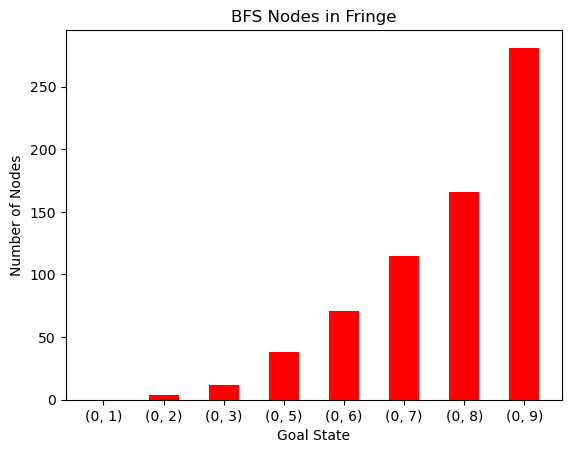

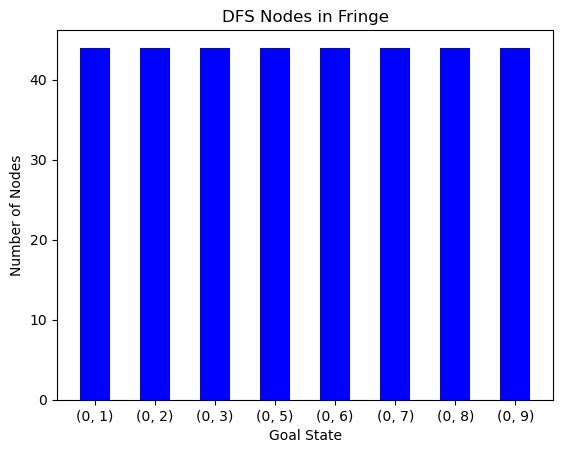

In [9]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# define the start and goal coordinates here
start = (0, 0)
goal = [(0, 1), (0, 2), (0, 3), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9)]

# define returned variables for printing
BFS_pathLength = []
BFS_numExpandedNodes = []
BFS_sizeFringe = []
BFS_Goals = []

# 1st Run: BFS Method
method = 'BFS'
y = 0
while y < 8:

    #print(f'Y Value: {y}')
    BFS_fringeArray, BFS_Goal, BFS_expanded_nodes, BFS_fringe_size, BFS_path = successor_func(maze, start, goal[y], method) # variables are defined in above cells
    
    BFS_Goals.append(goal[y])
    #print(f'Goals: {Goals}')

    thisExpandedNode = BFS_expanded_nodes
    BFS_numExpandedNodes.append(thisExpandedNode)
    #print(f'BFS Expanded: {BFS_numExpandedNodes}')

    thisSizeFringe = BFS_fringe_size
    BFS_sizeFringe.append(thisSizeFringe)
    #print(f'BFS Fringe: {BFS_sizeFringe}')

    thisPathLength = pathLength(BFS_path)
    thisPathLength = float("%0.6f" % thisPathLength)    # Source: https://stackoverflow.com/questions/14540143/python-3-float-decimal-points-precision
    #print(thisPathLength)
    BFS_pathLength.append(thisPathLength)
    #print(f'BFS Path Len: {BFS_pathLength}')
    y += 1

print(f'Goals: {BFS_Goals}')
print(f'Path Lengths: {BFS_pathLength}')
print(f'Expanded Nodes: {BFS_numExpandedNodes}')
print(f'Max Fringe Sizes: {BFS_sizeFringe}\n')

# define returned variables for printing
DFS_pathLength = []
DFS_numExpandedNodes = []
DFS_sizeFringe = []
DFS_Goals = []

# 2st Run: BFS Method
method = 'DFS'
y = 0
while y < 8:

    #print(f'Y Value: {y}')
    DFS_fringeArray, DFS_Goal, DFS_expanded_nodes, DFS_fringe_size, DFS_path = successor_func(maze, start, goal[y], method) # variables are defined in above cells
    
    DFS_Goals.append(goal[y])
    #print(f'Goals: {Goals}')

    thisExpandedNode = DFS_expanded_nodes
    DFS_numExpandedNodes.append(thisExpandedNode)
    #print(f'BFS Expanded: {BFS_numExpandedNodes}')

    thisSizeFringe = DFS_fringe_size
    DFS_sizeFringe.append(thisSizeFringe)
    #print(f'BFS Fringe: {BFS_sizeFringe}')

    thisPathLength = pathLength(DFS_path)
    thisPathLength = float("%0.6f" % thisPathLength)    # Source: https://stackoverflow.com/questions/14540143/python-3-float-decimal-points-precision
    #print(thisPathLength)
    DFS_pathLength.append(thisPathLength)
    #print(f'BFS Path Len: {BFS_pathLength}')
    y += 1

print(f'Goals: {DFS_Goals}')
print(f'Path Lengths: {DFS_pathLength}')
print(f'Expanded Nodes: {DFS_numExpandedNodes}')
print(f'Max Fringe Sizes: {DFS_sizeFringe}\n')

# 1st Bar plot: Path length for each algorithm
bfs_x = [1, 2, 3, 4, 5, 6, 7, 8]
bfs_height = BFS_sizeFringe
xlabel = ['(0, 1)', '(0, 2)', '(0, 3)', '(0, 5)', '(0, 6)', '(0, 7)', '(0, 8)', '(0, 9)']
plt.figure()
plt.bar(bfs_x, bfs_height, tick_label=xlabel, width=0.5, color='red')
plt.xlabel('Goal State')
plt.ylabel('Number of Nodes')
plt.title('BFS Nodes in Fringe')
plt.show()

# 2nd Bar plot: Path length for each algorithm
dfs_x = [1, 2, 3, 4, 5, 6, 7, 8]
dfs_height = DFS_sizeFringe
xlabel = ['(0, 1)', '(0, 2)', '(0, 3)', '(0, 5)', '(0, 6)', '(0, 7)', '(0, 8)', '(0, 9)']
plt.figure()
plt.bar(dfs_x, dfs_height, tick_label=xlabel, width=0.5, color='blue')
plt.xlabel('Goal State')
plt.ylabel('Number of Nodes')
plt.title('DFS Nodes in Fringe')
plt.show()

#### 5th Run:

- For goal state [0, 9]: compare path returned by BFS and DFS, respectively. Use Data Visualization to show the solution path found.

BFS Path Traveled: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (0, 9)]
Path Length: 9.828427
BFS Expanded Nodes: 436
BFS Fringe Size: 281

DFS Path Traveled: [(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (7, 9), (6, 9), (5, 8), (4, 9), (3, 8), (2, 9), (1, 8), (0, 9)]
Path Length: 22.213203
DFS Expanded Nodes: 45
DFS Fringe Size: 44



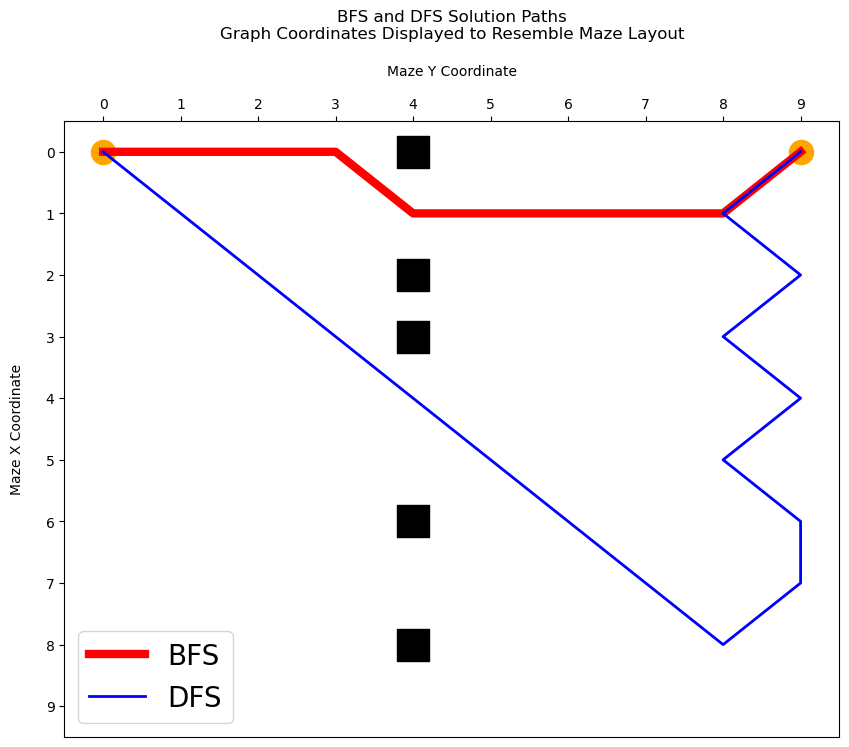

In [10]:
maze = [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

# define the start and goal coordinates here
start = (0, 0)
goal = (0, 9)

# 1st Run: BFS Method
method = 'BFS'
# define returned variables for printing
BFS_fringeArray, BFS_Goal, BFS_expanded_nodes, BFS_fringe_size, BFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

# 2nd run: DFS w/ same start and goal coordinates
method = 'DFS'
# define returned variables for printing
DFS_fringeArray, DFS_Goal, DFS_expanded_nodes, DFS_fringe_size, DFS_path = successor_func(maze, start, goal, method) # variables are defined in above cells

print(f'BFS Path Traveled: {BFS_path}')
print(f'Path Length: {pathLength(BFS_path):.6f}')
print(f'BFS Expanded Nodes: {BFS_expanded_nodes}')
print(f'BFS Fringe Size: {BFS_fringe_size}\n')

print(f'DFS Path Traveled: {DFS_path}')
print(f'Path Length: {pathLength(DFS_path):.6f}')
print(f'DFS Expanded Nodes: {DFS_expanded_nodes}')
print(f'DFS Fringe Size: {DFS_fringe_size}\n')

obstacles = []  # declare a list for obstacles in the maze
# Find obstacle coordinates:
for i in range(len(maze)):
    for j in range(len(maze[i])):
        if maze[i][j] == 1:
            #print(f'Position = {i, j}')
            obstacles.append((i, j))

#print(f'obstacles list: {obstacles}')  (debug)
startGoal = []      #contains the start and goal states as a list
startGoal.append(start)
startGoal.append(goal)
#print(startGoal)   (debug)

# create a figure:
fig = plt.figure(figsize=(10, 8))

# Set Axis Ticks at the top: https://stackoverflow.com/questions/8639973/how-to-plot-with-x-axis-at-the-top-of-the-figure
# Set X Label to the top: 
ax = fig.add_subplot(1, 1, 1)
ax.xaxis.set_ticks_position('top')

# Set X label to the top: https://stackoverflow.com/questions/49420563/how-can-i-move-the-xlabel-to-the-top
ax.xaxis.set_label_position('top')

# Flip X and Y Coordinates in a list: https://stackoverflow.com/questions/63017660/how-to-change-coordinates-x-and-y-in-numpy
# This will make the rendered chart path resemble the maze by flipping X and Y coordinates
newBFSPath = np.flip(BFS_path, 1)
#print(newBFSPath)          # debug
newDFSPath = np.flip(DFS_path, 1)
#print(newDFSPath)          # debug
newObstacles = np.flip(obstacles, 1)
newStartGoal = np.flip(startGoal, 1)

# one line plots: https://stackoverflow.com/questions/21519203/plotting-a-list-of-x-y-coordinates-in-matplotlib
ax1 = plt.plot(*zip(*newBFSPath), linewidth=6, color = 'red')
ax2 = plt.plot(*zip(*newDFSPath), linewidth=2, color = 'blue')
ax3 = plt.scatter(*zip(*newObstacles), marker=',', s=500, color='black')
ax4 = plt.scatter(*zip(*newStartGoal), marker='o', s=300, color = 'orange')


# label the graph
plt.xlabel('Maze Y Coordinate\n')
plt.ylabel('Maze X Coordinate\n')
plt.title("BFS and DFS Solution Paths\nGraph Coordinates Displayed to Resemble Maze Layout\n")

# set the graduation ticks of the graph axes
plt.xticks(range(0, 10))
plt.yticks(range(0, 10))

# set actual size limits of the square graphing area
plt.xlim(-0.5, 9.5)
plt.ylim(-0.5, 9.5)

# Configure graph legend: https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
plt.legend(['BFS', 'DFS'], fontsize=20, loc='lower left')

# invert Y-Axis: https://stackoverflow.com/questions/2051744/how-to-invert-the-x-or-y-axis
# plt.gca().invert_xaxis() # not needed here
plt.gca().invert_yaxis()
plt.show()